In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import joblib 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [305]:
df = pd.read_csv(r'./data/treated_data.csv')

In [306]:
df['precio_total'].max()

85110.0

In [307]:
df.drop(['room_type'],axis=1,inplace= True)

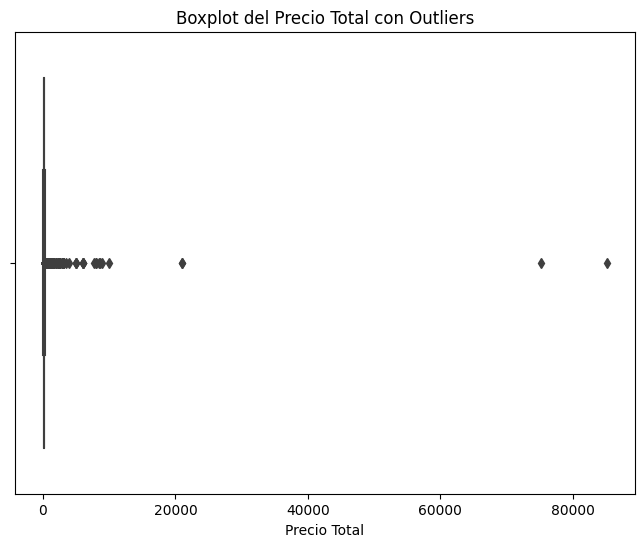

In [308]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='precio_total', data=df, showfliers=True, whis=1.5)

# Añadir detalles adicionales
plt.title('Boxplot del Precio Total con Outliers')
plt.xlabel('Precio Total')
plt.show()

In [309]:
cantidad_pisos_mas_1500 = (df['precio_total'] > 300).sum()
cantidad_pisos_mas_1500
# cantidad_pisos_menos_50 = (df['precio_total'] <50).sum()
# cantidad_pisos_menos_50

762

Top 10 características más importantes:
                Feature  Importance
7   review_scores_value    0.345582
2              distrito    0.149629
3          accommodates    0.090608
6                  beds    0.081129
0    ratio_de_respuesta    0.076131
5              bedrooms    0.049075
4        bathrooms_text    0.044873
12     Air conditioning    0.044075
9              Elevator    0.038302
1             superhost    0.025753


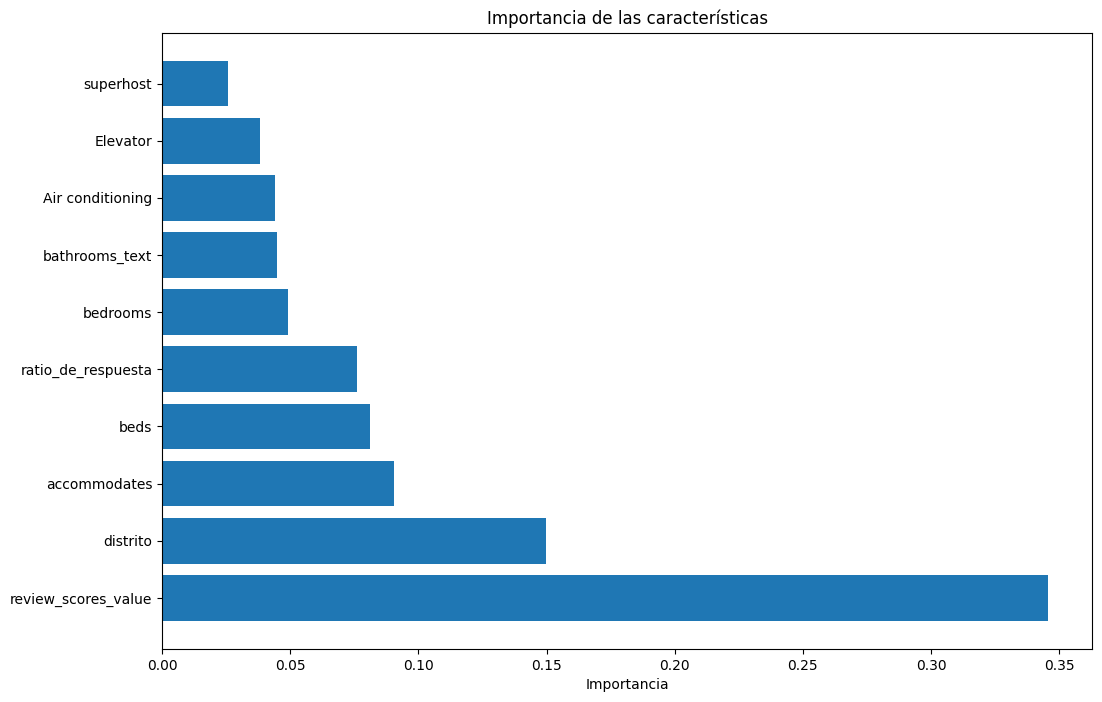

In [310]:
from sklearn.ensemble import RandomForestClassifier


# Suponiendo que df es tu DataFrame y 'target_column' es la columna objetivo
# Reemplaza 'target_column' con el nombre real de tu columna objetivo
target_column = 'precio_total'

# Dividir el DataFrame en características (X) y la variable objetivo (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Inicializar el clasificador de Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Ajustar el modelo al conjunto de datos
rf_classifier.fit(X, y)

# Obtener la importancia de las características
feature_importances = rf_classifier.feature_importances_

# Crear un DataFrame con la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Imprimir las 10 características más importantes
print("Top 10 características más importantes:")
print(feature_importance_df.head(10))

# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Importancia')
plt.title('Importancia de las características')
plt.show()


In [311]:
df.describe()

,ratio_de_respuesta,distrito,accommodates,bathrooms_text,bedrooms,beds,review_scores_value,precio_total
count,9907.000000,9907.000000,9907.000000,9907.000000,9907.000000,9907.000000,9907.000000,9907.000000
mean,76.697083,5.897749,3.926113,1.315181,1.721106,2.363783,4.597869,187.454123
std,39.356411,4.896768,1.916275,0.596789,0.890220,1.473877,0.361888,1222.037276
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,9.000000
25%,80.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.500000,81.000000
50%,100.000000,3.000000,4.000000,1.000000,2.000000,2.000000,4.680000,112.000000
75%,100.000000,9.000000,5.000000,1.500000,2.000000,3.000000,4.780000,169.000000
max,100.000000,20.000000,16.000000,10.000000,22.000000,17.000000,5.000000,85110.000000


<Axes: title={'center': 'Precio vs Distrito'}, xlabel='distrito', ylabel='precio_total'>

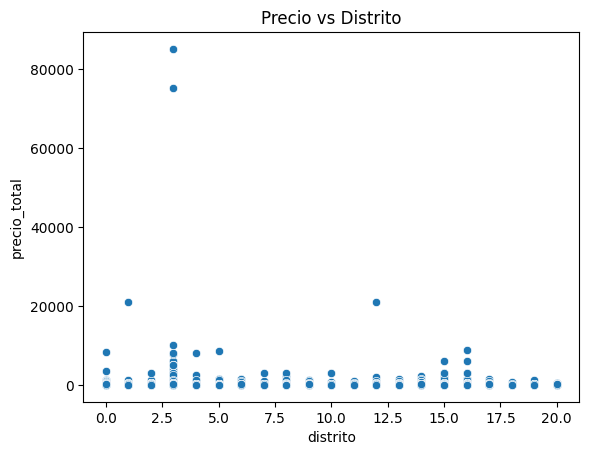

In [312]:
plt.title("Precio vs Distrito")
sns.scatterplot(y='precio_total',x='distrito',data=df)

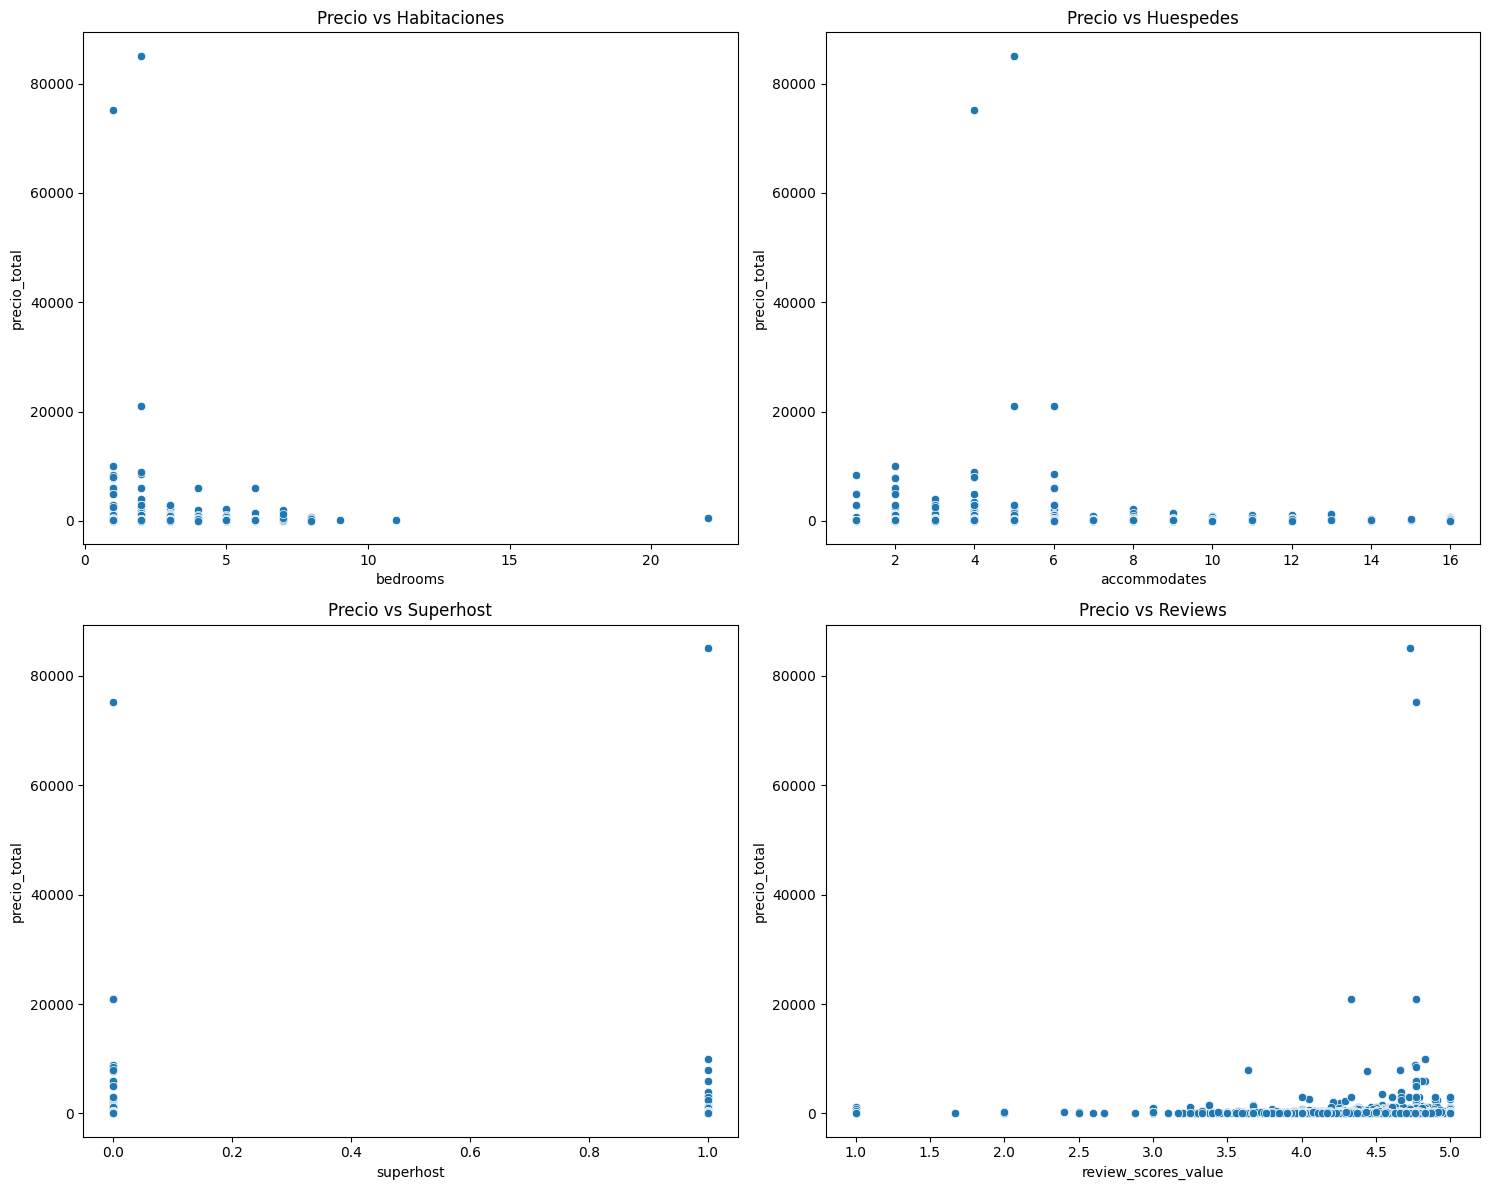

In [313]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Grafico 1
axes[0, 0].set_title("Precio vs Habitaciones")
sns.scatterplot(x='bedrooms', y='precio_total', data=df, ax=axes[0, 0])

# Grafico 2
axes[0, 1].set_title("Precio vs Huespedes")
sns.scatterplot(x='accommodates', y='precio_total', data=df, ax=axes[0, 1])

# Grafico 3
axes[1, 0].set_title("Precio vs Superhost")
sns.scatterplot(x='superhost', y='precio_total', data=df, ax=axes[1, 0])

# Grafico 4
axes[1, 1].set_title("Precio vs Reviews")
sns.scatterplot(x='review_scores_value', y='precio_total', data=df, ax=axes[1, 1])

# Ajustes de diseño
plt.tight_layout()
plt.show()

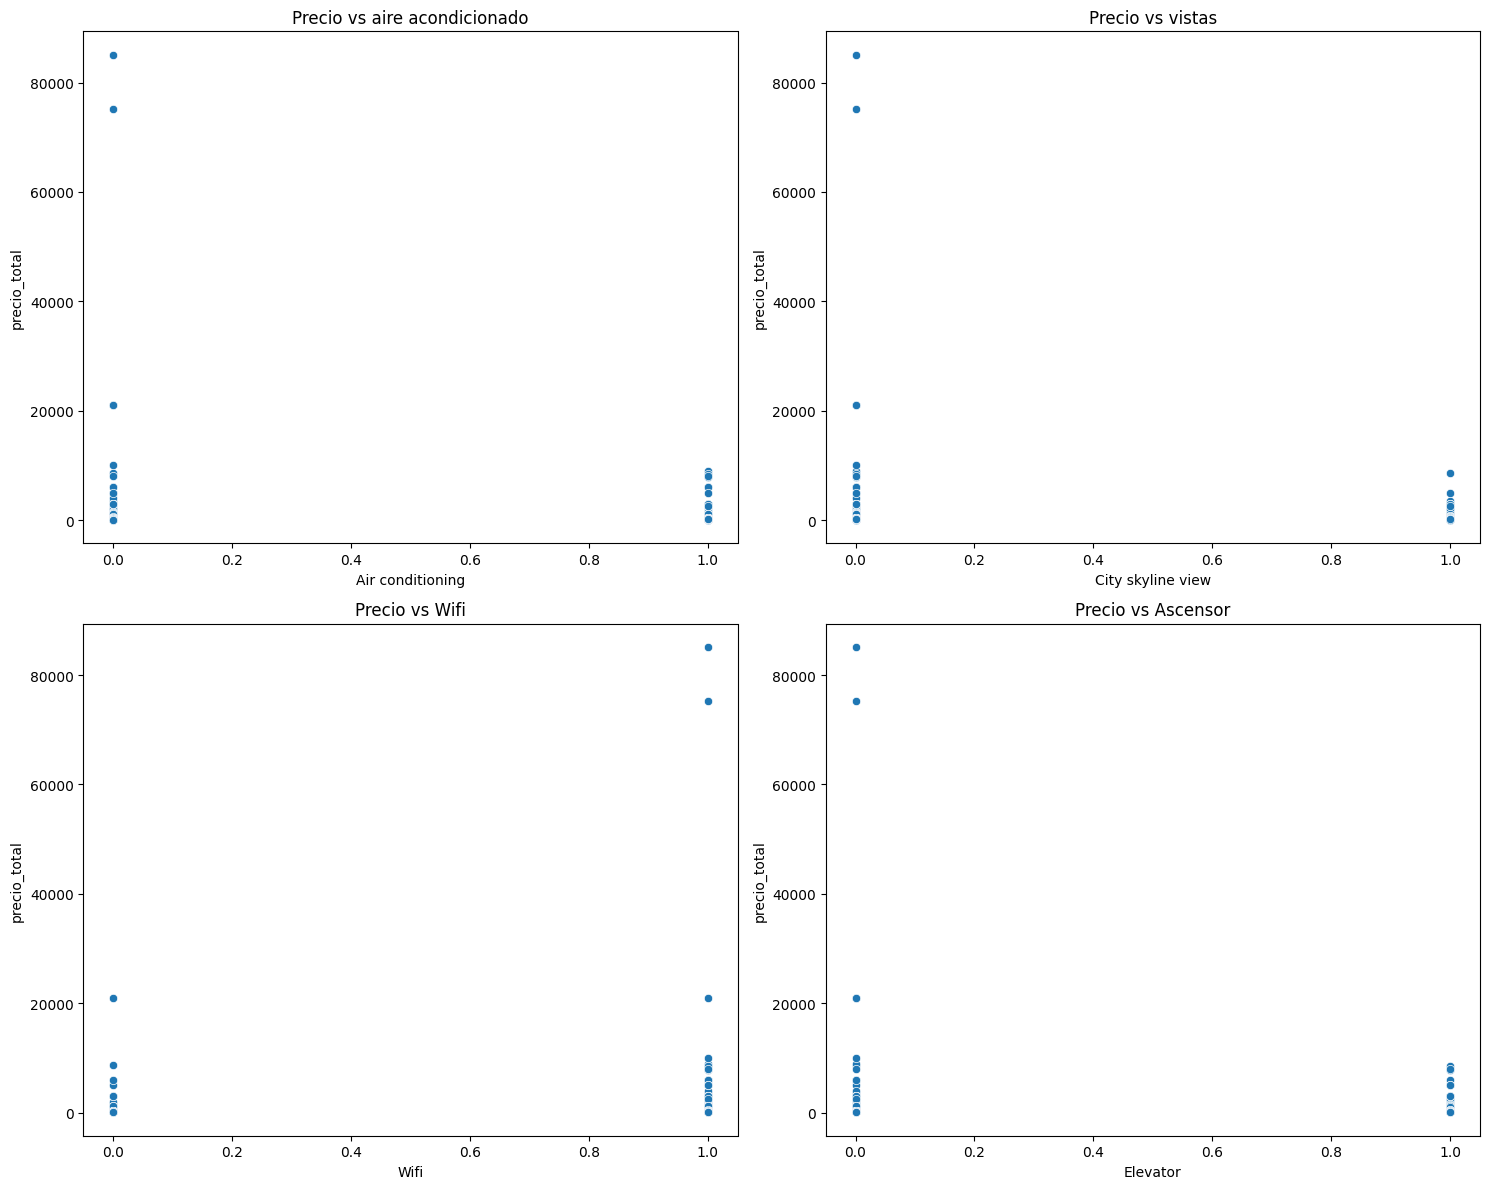

In [314]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Grafico 1
axes[0, 0].set_title("Precio vs aire acondicionado")
sns.scatterplot(x='Air conditioning', y='precio_total', data=df, ax=axes[0, 0])

# Grafico 2
axes[0, 1].set_title("Precio vs vistas")
sns.scatterplot(x='City skyline view', y='precio_total', data=df, ax=axes[0, 1])

# Grafico 3
axes[1, 0].set_title("Precio vs Wifi")
sns.scatterplot(x='Wifi', y='precio_total', data=df, ax=axes[1, 0])

# Grafico 4
axes[1, 1].set_title("Precio vs Ascensor")
sns.scatterplot(x='Elevator', y='precio_total', data=df, ax=axes[1, 1])

# Ajustes de diseño
plt.tight_layout()
plt.show()

<Axes: title={'center': 'precio vs baños'}, xlabel='bathrooms_text', ylabel='precio_total'>

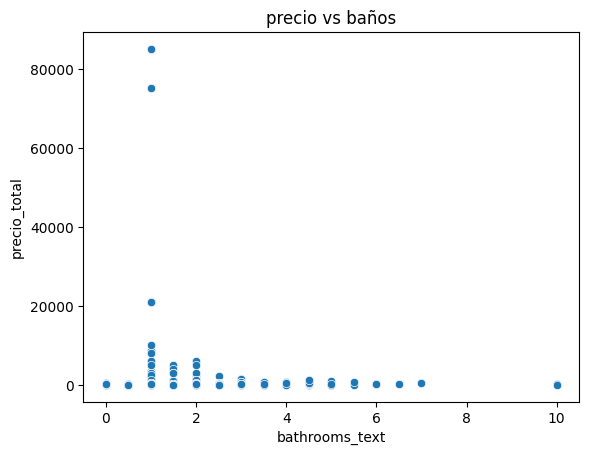

In [315]:
plt.title("precio vs baños")
sns.scatterplot(y='precio_total',x='bathrooms_text',data=df)

In [316]:
log_price = np.log(df['precio_total'])

# Then we add it to our data frame
df['log_price'] = log_price

df.head()

,ratio_de_respuesta,superhost,distrito,accommodates,bathrooms_text,bedrooms,beds,review_scores_value,precio_total,Kitchen,Elevator,Wifi,City skyline view,Air conditioning,log_price
0,4.0,False,3.0,3.0,1.0,6.0,1.0,4.81,92.0,True,True,True,False,True,4.521789
1,100.0,False,13.0,5.0,1.0,2.0,4.0,4.55,108.0,True,True,True,False,False,4.682131
2,4.0,False,3.0,2.0,1.0,1.0,2.0,4.69,91.0,True,True,True,False,True,4.510860
3,4.0,False,3.0,2.0,1.0,1.0,1.0,4.25,54.0,True,True,True,False,False,3.988984
4,100.0,True,3.0,2.0,1.0,1.0,2.0,4.84,99.0,True,True,True,False,True,4.595120


<Axes: title={'center': 'Log precio vs Reviews'}, xlabel='review_scores_value', ylabel='log_price'>

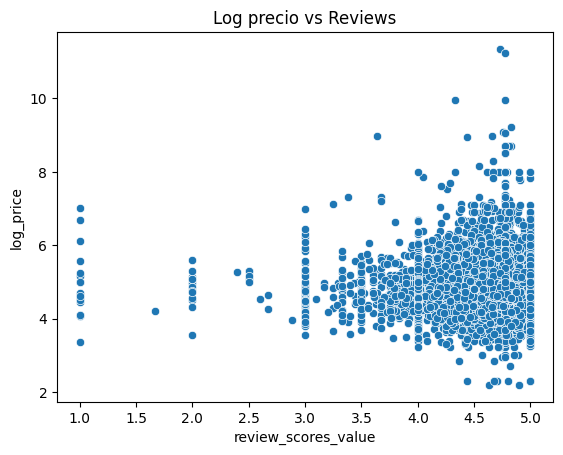

In [317]:

plt.title("Log precio vs Reviews")
sns.scatterplot(y='log_price',x='review_scores_value',data=df)

In [318]:
df = df.loc[(df['precio_total'] <= 350) & (df['precio_total'] >= 50)]
df

,ratio_de_respuesta,superhost,distrito,accommodates,bathrooms_text,bedrooms,beds,review_scores_value,precio_total,Kitchen,Elevator,Wifi,City skyline view,Air conditioning,log_price
0,4.0,False,3.0,3.0,1.0,6.0,1.0,4.81,92.0,True,True,True,False,True,4.521789
1,100.0,False,13.0,5.0,1.0,2.0,4.0,4.55,108.0,True,True,True,False,False,4.682131
2,4.0,False,3.0,2.0,1.0,1.0,2.0,4.69,91.0,True,True,True,False,True,4.510860
3,4.0,False,3.0,2.0,1.0,1.0,1.0,4.25,54.0,True,True,True,False,False,3.988984
4,100.0,True,3.0,2.0,1.0,1.0,2.0,4.84,99.0,True,True,True,False,True,4.595120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9902,100.0,True,3.0,3.0,1.0,1.0,2.0,4.70,101.0,True,False,True,False,True,4.615121
9903,100.0,False,0.0,2.0,1.0,1.0,2.0,5.00,181.0,True,True,True,False,True,5.198497
9904,98.0,False,13.0,4.0,2.0,2.0,2.0,5.00,98.0,True,True,True,True,True,4.584967
9905,100.0,False,15.0,2.0,1.0,1.0,1.0,4.56,95.0,True,False,True,False,True,4.553877


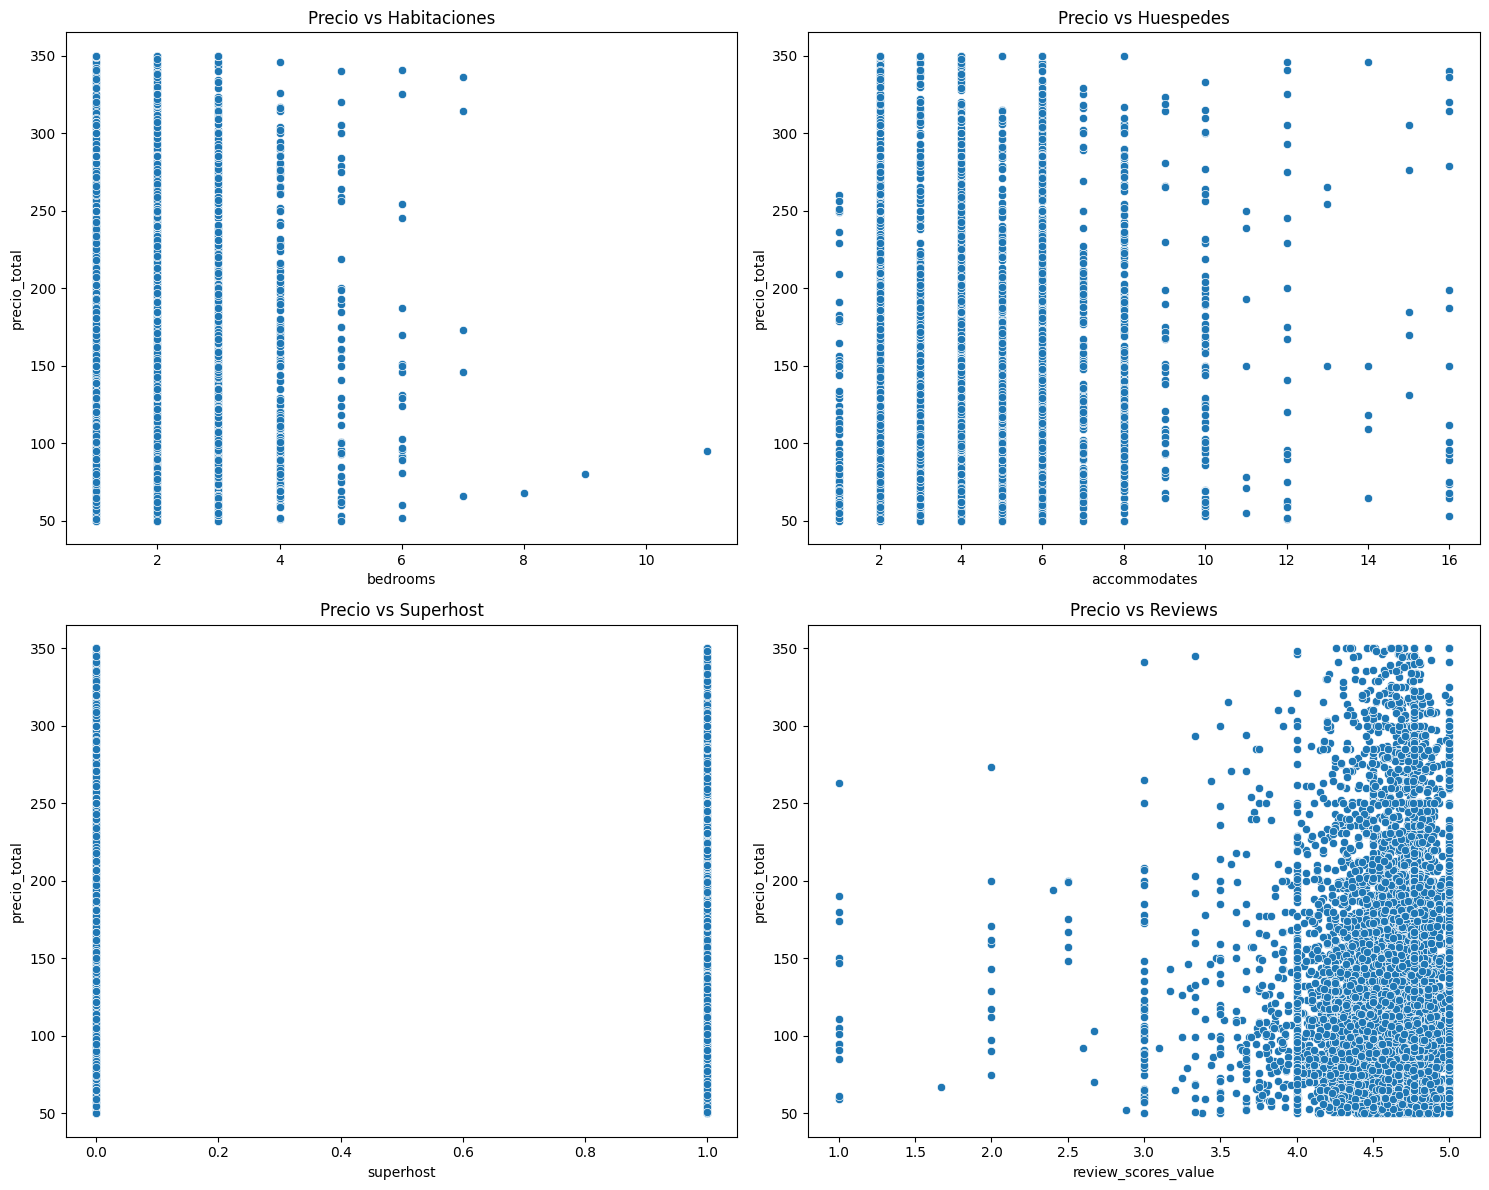

In [319]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Grafico 1
axes[0, 0].set_title("Precio vs Habitaciones")
sns.scatterplot(x='bedrooms', y='precio_total', data=df, ax=axes[0, 0])

# Grafico 2
axes[0, 1].set_title("Precio vs Huespedes")
sns.scatterplot(x='accommodates', y='precio_total', data=df, ax=axes[0, 1])

# Grafico 3
axes[1, 0].set_title("Precio vs Superhost")
sns.scatterplot(x='superhost', y='precio_total', data=df, ax=axes[1, 0])

# Grafico 4
axes[1, 1].set_title("Precio vs Reviews")
sns.scatterplot(x='review_scores_value', y='precio_total', data=df, ax=axes[1, 1])

# Ajustes de diseño
plt.tight_layout()
plt.show()

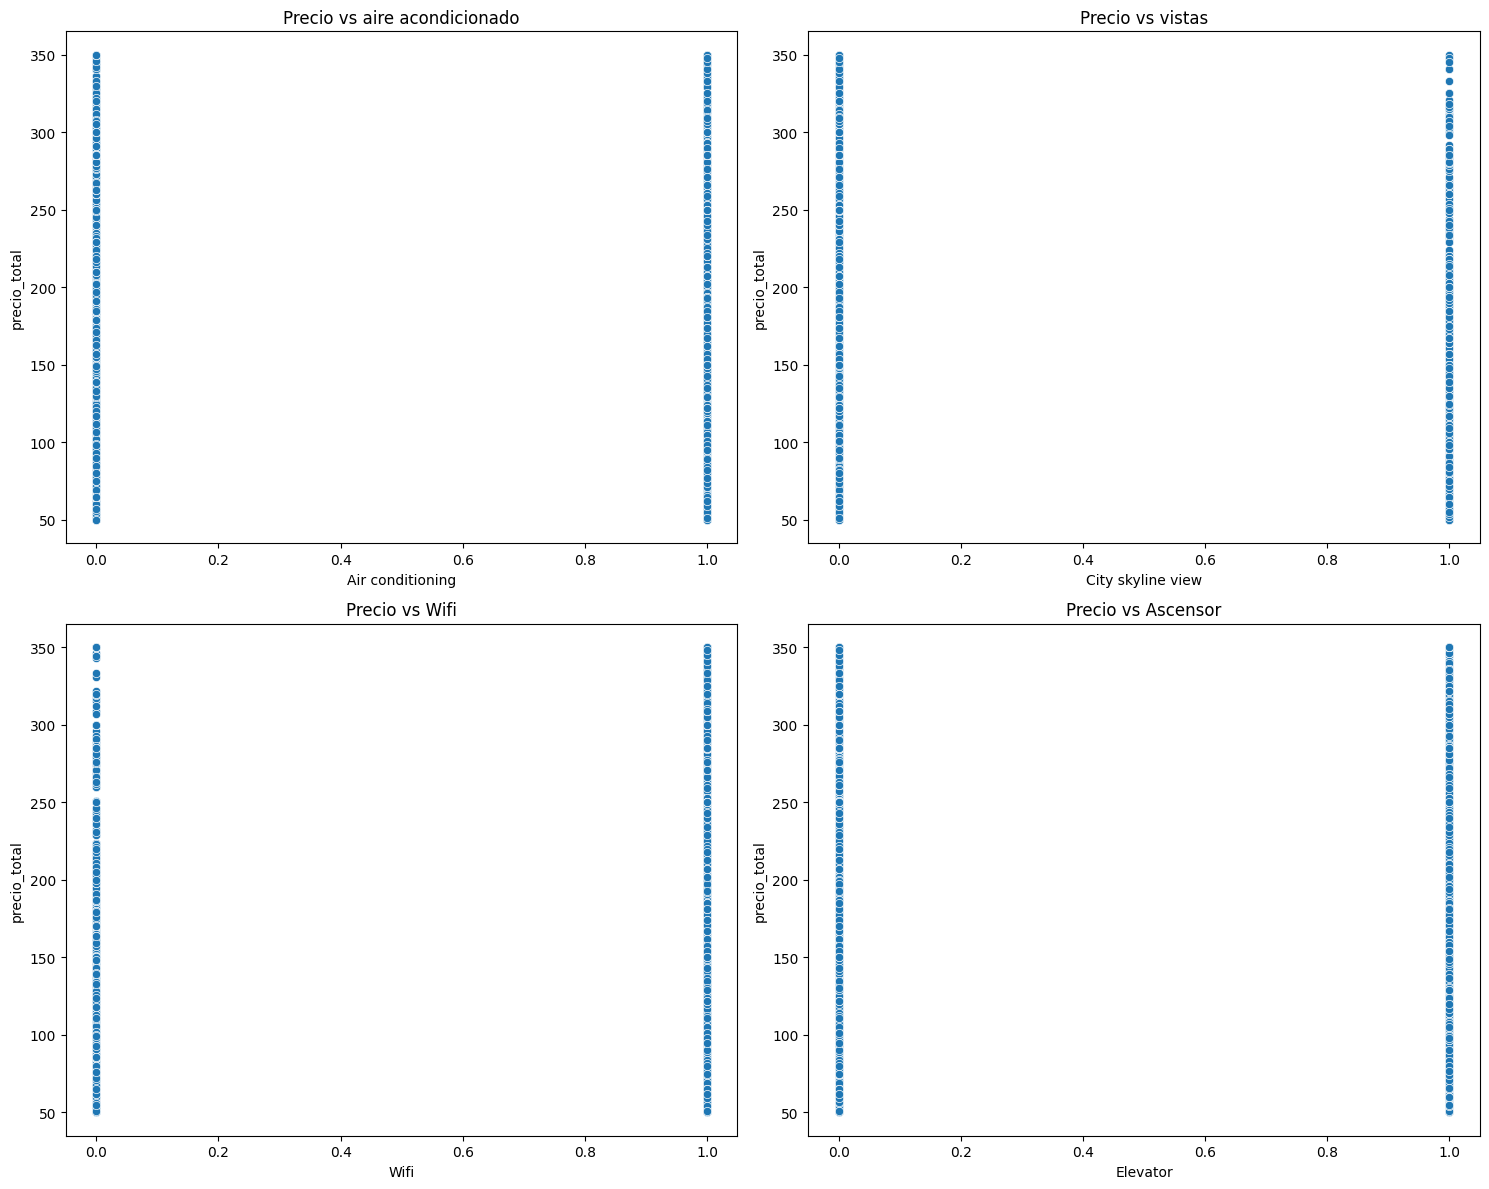

In [320]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Grafico 1
axes[0, 0].set_title("Precio vs aire acondicionado")
sns.scatterplot(x='Air conditioning', y='precio_total', data=df, ax=axes[0, 0])

# Grafico 2
axes[0, 1].set_title("Precio vs vistas")
sns.scatterplot(x='City skyline view', y='precio_total', data=df, ax=axes[0, 1])

# Grafico 3
axes[1, 0].set_title("Precio vs Wifi")
sns.scatterplot(x='Wifi', y='precio_total', data=df, ax=axes[1, 0])

# Grafico 4
axes[1, 1].set_title("Precio vs Ascensor")
sns.scatterplot(x='Elevator', y='precio_total', data=df, ax=axes[1, 1])

# Ajustes de diseño
plt.tight_layout()
plt.show()

In [321]:
# df.drop('precio_total',axis=1, inplace= True)

In [322]:
df.drop('log_price',axis=1, inplace= True)

<Axes: >

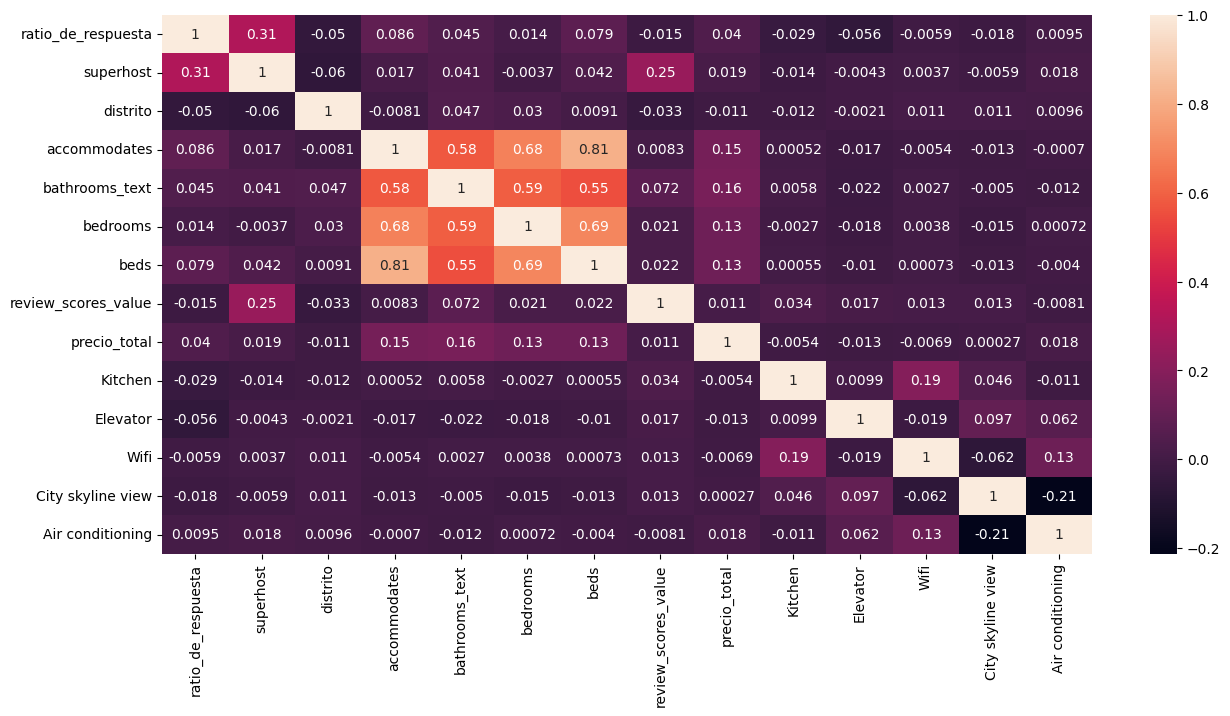

In [323]:
plt.figure(figsize=[15,7])
sns.heatmap(df.corr(), annot=True)

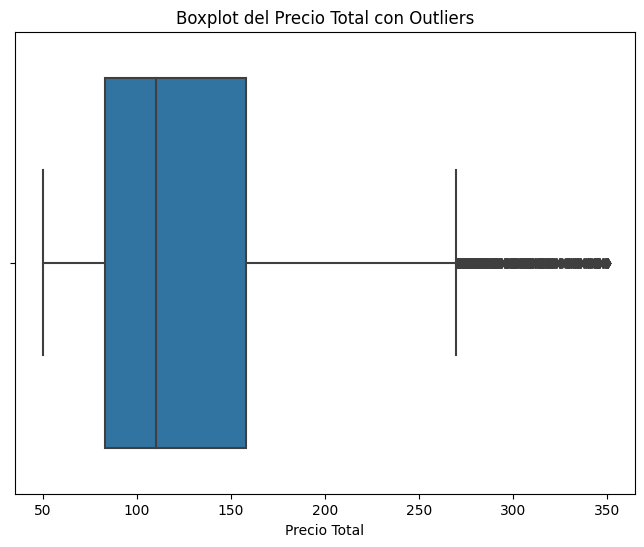

In [324]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='precio_total', data=df, showfliers=True, whis=1.5)

# Añadir detalles adicionales
plt.title('Boxplot del Precio Total con Outliers')
plt.xlabel('Precio Total')
plt.show()

In [325]:
df.to_csv('./data/data.csv', index=False)